fit takes np , tf data tensor data both train test

In [1]:
import numpy as np
from random import randint 
from sklearn.utils import shuffle 
from sklearn.preprocessing import MinMaxScaler 

In [4]:
#datacreation
train_labels = []
train_samples = []
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,110)
  train_samples.append(random_older)
  train_labels.append(0)
  pass
#85 percent
for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,110)
  train_samples.append(random_older)
  train_labels.append(0)
  pass


In [6]:
!nvidia-smi

Mon Sep 28 18:03:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels,train_samples = shuffle(train_labels,train_samples)

#fit takes numpy array 

In [8]:
# normalise 
scaler = MinMaxScaler(feature_range=(0,1))
# doesnt take 1 d data
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))




In [9]:
for i in scaled_train_samples:
  print(i)

[0.67010309]
[0.80412371]
[0.65979381]
[0.36082474]
[0.24742268]
[0.1443299]
[0.72164948]
[0.58762887]
[0.03092784]
[0.80412371]
[0.94845361]
[0.08247423]
[0.96907216]
[0.55670103]
[0.80412371]
[0.2371134]
[0.25773196]
[1.]
[0.8556701]
[0.31958763]
[0.7628866]
[0.95876289]
[0.03092784]
[0.69072165]
[0.40206186]
[0.65979381]
[0.02061856]
[0.65979381]
[0.8556701]
[0.31958763]
[0.13402062]
[0.07216495]
[0.7628866]
[0.81443299]
[0.54639175]
[0.98969072]
[0.07216495]
[0.88659794]
[0.37113402]
[0.06185567]
[0.37113402]
[0.37113402]
[0.55670103]
[0.44329897]
[0.42268041]
[0.28865979]
[0.74226804]
[0.13402062]
[0.44329897]
[0.25773196]
[0.72164948]
[0.29896907]
[0.08247423]
[0.28865979]
[0.09278351]
[0.19587629]
[0.39175258]
[0.36082474]
[0.58762887]
[0.25773196]
[0.78350515]
[0.43298969]
[0.63917526]
[0.82474227]
[0.89690722]
[0.]
[0.22680412]
[0.83505155]
[0.32989691]
[0.5257732]
[0.40206186]
[0.43298969]
[0.13402062]
[0.11340206]
[0.3814433]
[0.15463918]
[0.5257732]
[0.87628866]
[0.7628866]

In [10]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation,Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy




In [11]:
phus_gpy = tf.config.experimental.list_physical_devices('GPU')
print("Num of GPU available ",len(phus_gpy))





Num of GPU available  1


In [13]:
model = Sequential([
      Dense(units = 16,input_shape = (1,)  ,activation='relu'            ),
      Dense(units = 32 ,activation='relu'            ),
      Dense(units = 2,activation='softmax'            ),

])
# 1->16->32->2



In [14]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(x = scaled_train_samples,y=train_labels,validation_split=0.1, batch_size=10,epochs = 30,shuffle=True,verbose = 2)
#training data is suffle ,split occurs before shuffle happens therefore not correct split
 


Epoch 1/30
189/189 - 0s - loss: 0.0501 - accuracy: 0.9931 - val_loss: 0.0499 - val_accuracy: 1.0000
Epoch 2/30
189/189 - 0s - loss: 0.0494 - accuracy: 1.0000 - val_loss: 0.0497 - val_accuracy: 1.0000
Epoch 3/30
189/189 - 0s - loss: 0.0489 - accuracy: 0.9958 - val_loss: 0.0487 - val_accuracy: 1.0000
Epoch 4/30
189/189 - 0s - loss: 0.0482 - accuracy: 0.9979 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 5/30
189/189 - 0s - loss: 0.0477 - accuracy: 0.9989 - val_loss: 0.0479 - val_accuracy: 1.0000
Epoch 6/30
189/189 - 0s - loss: 0.0470 - accuracy: 0.9974 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch 7/30
189/189 - 0s - loss: 0.0465 - accuracy: 0.9984 - val_loss: 0.0468 - val_accuracy: 1.0000
Epoch 8/30
189/189 - 0s - loss: 0.0460 - accuracy: 0.9963 - val_loss: 0.0462 - val_accuracy: 1.0000
Epoch 9/30
189/189 - 0s - loss: 0.0454 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 1.0000
Epoch 10/30
189/189 - 0s - loss: 0.0449 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 1.0000

In [ ]:
#validation set train subset validate on validate data
# pass validation set daat in fit 

In [ ]:
# verify on #test data

In [19]:
#datacreation
test_labels = []
test_samples = []
for i in range(10):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,110)
  test_samples.append(random_older)
  test_labels.append(0)
  pass
#95 percent
for i in range(200):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,110)
  test_samples.append(random_older)
  test_labels.append(0)
  pass

In [20]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels , test_samples = shuffle(test_labels,test_samples)

In [21]:
scaled_test_sampels = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
#PREDICT

In [23]:
predict_ions = model.predict(x = scaled_test_sampels , batch_size = 10,verbose = 0)

In [27]:
rounded_predictions = np.argmax(predict_ions,axis =-1)

In [24]:
for i in predict_ions:
  print(i)

#prob of each index to be true

[0.7836686  0.21633145]
[0.7836686  0.21633145]
[9.9999928e-01 7.6447344e-07]
[9.9997807e-01 2.1879228e-05]
[6.0099381e-04 9.9939895e-01]
[6.104104e-04 9.993895e-01]
[9.9999893e-01 1.1280308e-06]
[9.9996567e-01 3.4301185e-05]
[0.6979423 0.3020577]
[9.9999952e-01 5.2462894e-07]
[7.355984e-04 9.992644e-01]
[9.9999928e-01 7.6447344e-07]
[6.719902e-04 9.993280e-01]
[0.13465442 0.86534554]
[0.01037062 0.9896293 ]
[9.992021e-01 7.979209e-04]
[9.9999750e-01 2.4749888e-06]
[0.9882811  0.01171887]
[0.05953952 0.94046044]
[0.7836686  0.21633145]
[9.9999976e-01 2.7470631e-07]
[9.999999e-01 7.780199e-08]
[0.00271208 0.997288  ]
[0.00271208 0.997288  ]
[6.9125125e-04 9.9930871e-01]
[7.8278914e-04 9.9921715e-01]
[0.00127516 0.9987249 ]
[5.8259367e-04 9.9941742e-01]
[9.9949086e-01 5.0909875e-04]
[5.9172243e-04 9.9940825e-01]
[0.00663981 0.9933602 ]
[0.99693227 0.00306776]
[9.9999893e-01 1.1280308e-06]
[9.992021e-01 7.979209e-04]
[9.9999750e-01 2.4749888e-06]
[9.9999988e-01 1.4619197e-07]
[9.996753e-0

In [ ]:
# onfusion matrix 

In [25]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix 
import itertools 
import matplotlib.pyplot as plt


In [30]:
cn = confusion_matrix(y_true=test_labels,y_pred = rounded_predictions)
def plot_confusion_matrix(cm,classes,normalize = False , title = 'Confusion matrix',cmap = plt.cm.Blues):

  plt.imshow(cm,interpolation='nearest',cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
    print("Normalised confusion matrix")

  else:
    print("Confusion matrix without normalisation")

  print(cm) 
  thresh = cm.max()/2 
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1]) ):
    plt.text(j,i,cm[i,j],horizontalalignment = "center",color = "white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')




  pass 


Confusion matrix without normalisation
[[210   0]
 [  0 210]]


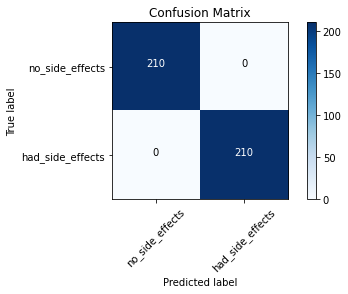

In [31]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm = cn , classes = cm_plot_labels,title = 'Confusion Matrix')

In [ ]:
#save and load keras model

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [33]:
# h5 extension 

model.save("mdeical_fake_data_shit.h5")

In [ ]:
# arcghitecture 
# weights 
# training configureaiotn 
# state of optimiser allowing where you left off

# //everything

In [34]:
from tensorflow.keras.models import load_model 
new_model = load_model("mdeical_fake_data_shit.h5")

In [37]:
new_model.summary()
new_model.get_weights()
new_model.optimizer


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [38]:
#to json 

# only architecture no wieghts
json_string = model.to_json()

# save as yaml to_yaml

In [39]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [40]:
from tensorflow.keras.models import model_from_json 
model_architecture = model_from_json(json_string)

In [41]:
#save only wiehgts find architecture
model.save_weights("name1.h5")



In [42]:
modelw = Sequential([
      Dense(units = 16,input_shape = (1,)  ,activation='relu'            ),
      Dense(units = 32 ,activation='relu'            ),
      Dense(units = 2,activation='softmax'            ),

])

In [43]:
modelw.load_weights('name1.h5')
modelw.get_weights()

[array([[ 0.6833899 ,  0.3563522 , -0.54021454, -0.5298049 , -0.19759363,
         -0.55187196,  0.87540156,  0.8610746 ,  0.8047683 ,  0.5501205 ,
         -0.18149066,  0.17677958, -0.4312858 , -0.0429914 ,  0.01118612,
         -0.02030319]], dtype=float32),
 array([-0.24153659,  0.591961  ,  0.        ,  0.        ,  0.        ,
         0.        , -0.25805238, -0.2590699 , -0.26845613, -0.17042446,
         0.        ,  0.5309882 ,  0.        ,  0.        , -0.01173429,
         0.        ], dtype=float32),
 array([[-0.62395984,  0.09073968,  0.5577959 , -0.28944746,  0.5165858 ,
          0.03672567,  0.77214015,  0.32292923, -0.25656283, -0.0142813 ,
         -0.23267117, -0.09202504, -0.76537806,  0.26733673,  0.34156618,
          0.31044078,  0.37492487,  0.25911227,  0.7930029 ,  0.17155087,
         -0.1533662 ,  0.7652697 , -0.7565883 , -0.1880213 ,  0.3221154 ,
         -0.29940456, -0.28461236,  0.953076  ,  0.32394043,  0.7897136 ,
         -0.07077542,  0.76342905],
 

In [ ]:
1:04:00